In [28]:
#Data visualization and Manipulation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
#Natural Language Processing Libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#Sckit_learning libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#Evaluation Metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from scikitplot.metrics import plot_confusion_matrix
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
train_df = pd.read_csv(r'''D:\chinnu\egnite ds\emotions\train.txt''',delimiter = ';',names = ['text','label'])
val_df = pd.read_csv(r'''D:\chinnu\egnite ds\emotions\val.txt''',delimiter = ';',names = ['text','label'])

In [3]:
train_df = train_df.head(1000)
val_df = val_df.head(1000)

In [4]:
df = pd.concat([train_df,val_df])
df.reset_index(inplace = True,drop = False)

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   2000 non-null   int64 
 1   text    2000 non-null   object
 2   label   2000 non-null   object
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


c:\users\noel\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

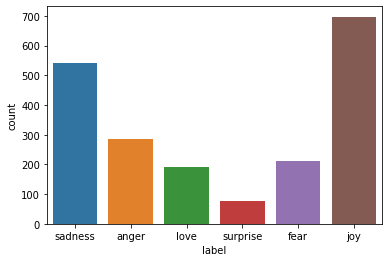

In [6]:
sns.countplot(df.label)

In [7]:
def custom_encoder(df):
    df.replace(to_replace = "surprise",value = 1, inplace = True)
    df.replace(to_replace = "love",value = 1, inplace = True)
    df.replace(to_replace = "fear",value = 0, inplace = True)
    df.replace(to_replace = "joy",value = 1, inplace = True)
    df.replace(to_replace = "anger",value = 0, inplace = True)
    df.replace(to_replace = "sadness",value = 0, inplace = True)

In [8]:
custom_encoder(df['label'])

c:\users\noel\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

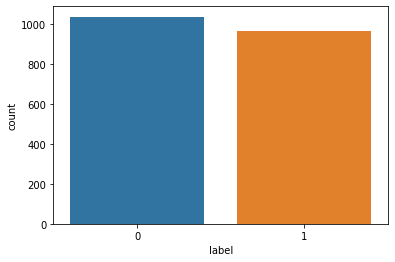

In [9]:
sns.countplot(df.label)

In [10]:
lm = WordNetLemmatizer()
def pre_processing(df_col):
    corpus = []
    for item in df_col :
        new_item = re.sub("[^a-zA-Z]", ' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [11]:
corpus = pre_processing(df['text'])

In [12]:
corpus

['didnt feel humiliated',
 'go feeling hopeless damned hopeful around someone care awake',
 'im grabbing minute post feel greedy wrong',
 'ever feeling nostalgic fireplace know still property',
 'feeling grouchy',
 'ive feeling little burdened lately wasnt sure',
 'ive taking milligram time recommended amount ive fallen asleep lot faster also feel like funny',
 'feel confused life teenager jaded year old man',
 'petronas year feel petronas performed well made huge profit',
 'feel romantic',
 'feel like make suffering seeing mean something',
 'feel running divine experience expect type spiritual encounter',
 'think easiest time year feel dissatisfied',
 'feel low energy thirsty',
 'immense sympathy general point possible proto writer trying find time write corner life sign agent let alone publishing contract feel little precious',
 'feel reassured anxiety side',
 'didnt really feel embarrassed',
 'feel pretty pathetic time',
 'started feeling sentimental doll child began collection vint

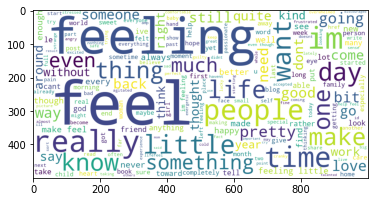

In [13]:

word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud += " ".join(word)
wordcloud = WordCloud(width = 1000, height= 500, background_color = 'white', min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

In [14]:
cv = CountVectorizer(ngram_range = (1,2))

In [15]:
traindata = cv.fit_transform(corpus)
X = traindata
Y = df.label

In [16]:
parameters = {'max_features': ('auto','sqrt'),
             'n_estimators': [500, 1000],
             'max_depth': [10, None],
             'min_samples_split': [5],
             'min_samples_leaf': [1],
             'bootstrap': [True]}

In [17]:
grid_search = GridSearchCV(RandomForestClassifier(),parameters,cv=5,return_train_score=True,n_jobs=-1)
grid_search.fit(X,Y)
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1000}

In [18]:
for i in range(6):
    print('Parameters: ',grid_search.cv_results_['params'][i])
    print('Mean Test Score: ',grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ',grid_search.cv_results_['rank_test_score'][i])

Parameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Mean Test Score:  0.623
Rank:  7
Parameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000}
Mean Test Score:  0.63
Rank:  5
Parameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Mean Test Score:  0.6205
Rank:  8
Parameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000}
Mean Test Score:  0.6239999999999999
Rank:  6
Parameters:  {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Mean Test Score:  0.7869999999999999
Rank:  4
Parameters:  {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf':

In [19]:
rfc = RandomForestClassifier(max_features=grid_search.best_params_['max_features'],
                        max_depth=grid_search.best_params_['max_depth'],
                                      n_estimators=grid_search.best_params_['n_estimators'],
                                      min_samples_split=grid_search.best_params_['min_samples_split'],
                                      min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                      bootstrap=grid_search.best_params_['bootstrap'])
rfc.fit(X,Y)

RandomForestClassifier(max_features='sqrt', min_samples_split=5,
                       n_estimators=1000)

In [21]:
test_df = pd.read_csv(r'''D:\chinnu\egnite ds\emotions\test.txt''',delimiter=';',names=['text','label'])

In [22]:
X_test,Y_test = test_df.text,test_df.label
#encode the labels into two classes , 0 and 1
test_df = custom_encoder(Y_test)
#pre-processing of text
test_corpus = pre_processing(X_test)
#convert text data into vectors
testdata = cv.transform(test_corpus)
#predict the target
predictions = rfc.predict(testdata)

Accuracy_score:  0.826
Precision_score:  0.9144927536231884
Recall_score:  0.6858695652173913
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.95      0.85      1080
           1       0.91      0.69      0.78       920

    accuracy                           0.83      2000
   macro avg       0.85      0.82      0.82      2000
weighted avg       0.84      0.83      0.82      2000



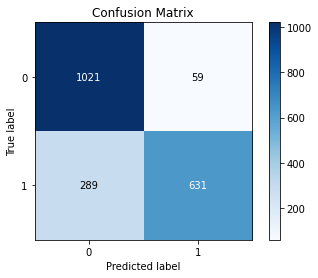

In [23]:
plot_confusion_matrix(Y_test,predictions)
acc_score = accuracy_score(Y_test,predictions)
pre_score = precision_score(Y_test,predictions)
rec_score = recall_score(Y_test,predictions)
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)
print("-"*50)
cr = classification_report(Y_test,predictions)
print(cr)

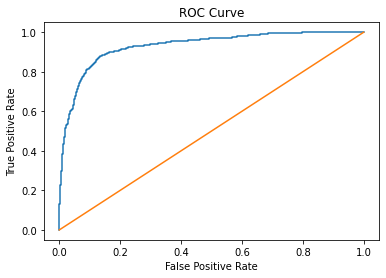

In [24]:
predictions_probability = rfc.predict_proba(testdata)
fpr,tpr,thresholds = roc_curve(Y_test,predictions_probability[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [25]:
def expression_check(prediction_input):
    if prediction_input == 0:
        print("Input statement has Negative Sentiment.")
    elif prediction_input == 1:
        print("Input statement has Positive Sentiment.")
    else:
        print("Invalid Statement.")

In [26]:
def sentiment_predictor(input):
    input = pre_processing(input)
    transformed_input = cv.transform(input)
    prediction = rfc.predict(transformed_input)
    expression_check(prediction)

In [27]:
input1 = ["Sometimes I just want to punch someone in the face."]
input2 = ["I bought a new phone and it's so good."]
sentiment_predictor(input1)
sentiment_predictor(input2)

Input statement has Negative Sentiment.
Input statement has Positive Sentiment.


In [75]:
df['preprocess text'] = corpus

In [76]:
sent = SentimentIntensityAnalyzer()

In [77]:
polarity = [round(sent.polarity_scores(i)['compound'], 2) for i in df['text']]
df['sentiment_polarity'] = polarity


In [78]:
df

,index,text,label,sentiment_polarity,preprocess text,positive_count,negative count,negative_count,Sentiment Score
0,0,i didnt feel humiliated,0,0.26,didnt feel humiliated,17,17,17,0.94
1,1,i can go from feeling so hopeless to so damned...,0,0.08,go feeling hopeless damned hopeful around some...,40,40,40,0.98
2,2,im grabbing a minute to post i feel greedy wrong,0,-0.66,im grabbing minute post feel greedy wrong,27,27,27,0.96
3,3,i am ever feeling nostalgic about the fireplac...,1,0.13,ever feeling nostalgic fireplace know still pr...,33,33,33,0.97
4,4,i am feeling grouchy,0,-0.34,feeling grouchy,9,9,9,0.90
...,...,...,...,...,...,...,...,...,...
1995,995,i almost feel hesitant to write about this it ...,0,0.28,almost feel hesitant write topic near dear heart,37,37,37,0.97
1996,996,i struggle with those pressures when i don t f...,0,-0.80,struggle pressure feel like pulling together w...,95,95,95,0.99
1997,997,i feel as if there is anyone who really unders...,0,-0.47,feel anyone really understands insincere motif...,39,39,39,0.98
1998,998,i know jack and he doesnt give up on men easy ...,1,0.61,know jack doesnt give men easy dump feel succe...,33,33,33,0.97


In [37]:
df.to_excel('sentiment.xlsx')

In [39]:
positive_df = df.loc[df['label'] == 1]

In [40]:
positive_df

,index,text,label,sentiment_polarity
3,3,i am ever feeling nostalgic about the fireplac...,1,0.13
6,6,ive been taking or milligrams or times recomme...,1,0.84
8,8,i have been with petronas for years i feel tha...,1,0.74
9,9,i feel romantic too,1,0.40
11,11,i do feel that running is a divine experience ...,1,0.56
...,...,...,...,...
1986,986,i am feeling amazing,1,0.65
1987,987,i somehow feel glad shes now in malacca with m...,1,0.46
1988,988,i was constantly amazed by the world building ...,1,0.96
1993,993,i don t like orange but today i m feeling stra...,1,0.63


In [42]:
negative_df = df.loc[df['label'] == 0]
negative_df

,index,text,label,sentiment_polarity
0,0,i didnt feel humiliated,0,0.26
1,1,i can go from feeling so hopeless to so damned...,0,0.08
2,2,im grabbing a minute to post i feel greedy wrong,0,-0.66
4,4,i am feeling grouchy,0,-0.34
5,5,ive been feeling a little burdened lately wasn...,0,-0.43
...,...,...,...,...
1994,994,i cannot help but feel insulted that my master...,0,-0.48
1995,995,i almost feel hesitant to write about this it ...,0,0.28
1996,996,i struggle with those pressures when i don t f...,0,-0.80
1997,997,i feel as if there is anyone who really unders...,0,-0.47


In [46]:
pos_words_file = df.to_csv("positive words.csv")
neg_words_file = df.to_csv("negative words.csv")

In [73]:
neg_file = open('negative words.csv', 'r')
pos_file = open('positive words.csv', 'r')
pos_words = pos_file.read().split()
neg_words = neg_file.read().split()

In [74]:
df

,index,text,label,sentiment_polarity,preprocess text,positive_count,negative count,negative_count,Sentiment Score
0,0,i didnt feel humiliated,0,0.26,didnt feel humiliated,17,17,17,0.94
1,1,i can go from feeling so hopeless to so damned...,0,0.08,go feeling hopeless damned hopeful around some...,40,40,40,0.98
2,2,im grabbing a minute to post i feel greedy wrong,0,-0.66,im grabbing minute post feel greedy wrong,27,27,27,0.96
3,3,i am ever feeling nostalgic about the fireplac...,1,0.13,ever feeling nostalgic fireplace know still pr...,33,33,33,0.97
4,4,i am feeling grouchy,0,-0.34,feeling grouchy,9,9,9,0.90
...,...,...,...,...,...,...,...,...,...
1995,995,i almost feel hesitant to write about this it ...,0,0.28,almost feel hesitant write topic near dear heart,37,37,37,0.97
1996,996,i struggle with those pressures when i don t f...,0,-0.80,struggle pressure feel like pulling together w...,95,95,95,0.99
1997,997,i feel as if there is anyone who really unders...,0,-0.47,feel anyone really understands insincere motif...,39,39,39,0.98
1998,998,i know jack and he doesnt give up on men easy ...,1,0.61,know jack doesnt give men easy dump feel succe...,33,33,33,0.97


In [69]:
num_pos = df['preprocess text'].map(lambda x : len([i for i in x if i in pos_words]))
num_neg = df['preprocess text'].map(lambda x : len([i for i in x if i in neg_words]))

In [70]:
df['positive_count'] = num_pos
df['negative_count'] = num_neg

In [71]:
df['Sentiment Score']  = round(df['positive_count']/(df['negative_count']+1),2)

In [72]:
df

,index,text,label,sentiment_polarity,preprocess text,positive_count,negative count,negative_count,Sentiment Score
0,0,i didnt feel humiliated,0,0.26,didnt feel humiliated,17,17,17,0.94
1,1,i can go from feeling so hopeless to so damned...,0,0.08,go feeling hopeless damned hopeful around some...,40,40,40,0.98
2,2,im grabbing a minute to post i feel greedy wrong,0,-0.66,im grabbing minute post feel greedy wrong,27,27,27,0.96
3,3,i am ever feeling nostalgic about the fireplac...,1,0.13,ever feeling nostalgic fireplace know still pr...,33,33,33,0.97
4,4,i am feeling grouchy,0,-0.34,feeling grouchy,9,9,9,0.90
...,...,...,...,...,...,...,...,...,...
1995,995,i almost feel hesitant to write about this it ...,0,0.28,almost feel hesitant write topic near dear heart,37,37,37,0.97
1996,996,i struggle with those pressures when i don t f...,0,-0.80,struggle pressure feel like pulling together w...,95,95,95,0.99
1997,997,i feel as if there is anyone who really unders...,0,-0.47,feel anyone really understands insincere motif...,39,39,39,0.98
1998,998,i know jack and he doesnt give up on men easy ...,1,0.61,know jack doesnt give men easy dump feel succe...,33,33,33,0.97


In [79]:
df.to_excel("Sentiment Analysis.xlsx")